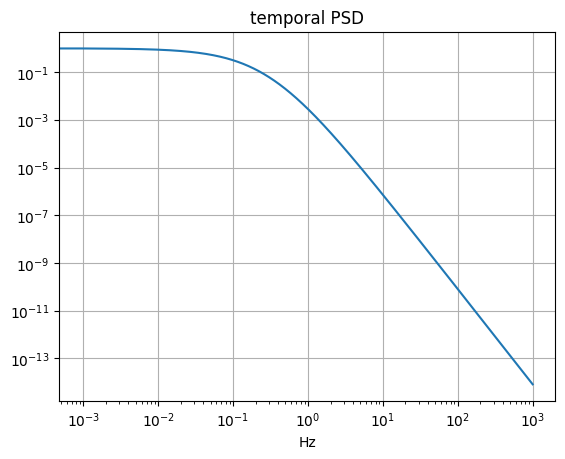

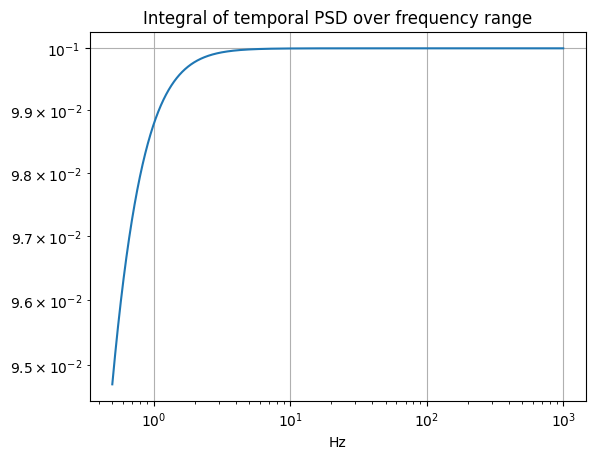

In [5]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

import lina
from lina import psds


fmax = 1000*u.Hz
f_knee = 0.3*u.Hz
freqs, delF = psds.generate_freqs(Nf=2**20+1, f_max=fmax)
psd = psds.kneePSD(freqs, 1, f_knee, 4)
psds.plot(freqs, psd, plot_integral=True)



In [34]:
len(times), 2*(len(freqs)-1)

(2097152, 2097152)

1048577 2097152
1448.1546878700499 2.857352748770126e-13
1048577 2097152
1448.154687870049 2.872523812754847e-13


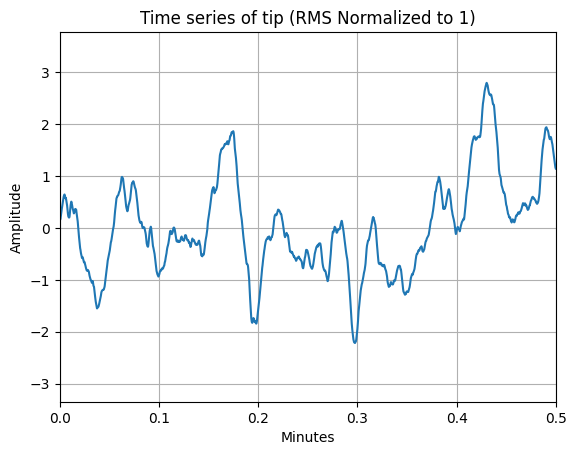

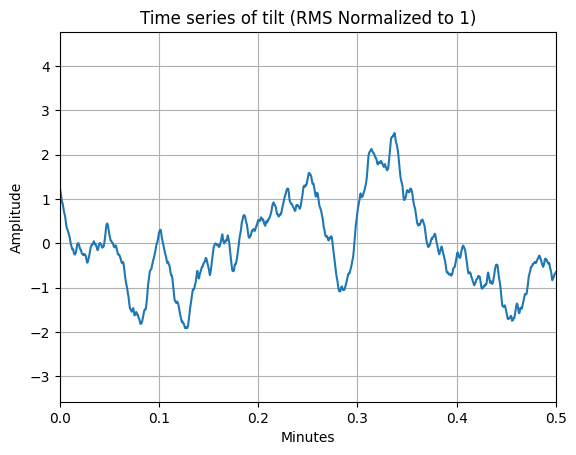

In [11]:

tip, times = psds.generate_time_series(psd, fmax, rms=1, seed=123)
tilt, _ = psds.generate_time_series(psd, fmax, rms=1, seed=1234)

plt.plot(times/60, tip)
plt.title('Time series of tip (RMS Normalized to 1)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([0,0.5])
plt.xlabel('Minutes')
plt.show()

plt.plot(times/60, tilt)
plt.title('Time series of tilt (RMS Normalized to 1)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([0,0.5])
plt.xlabel('Minutes')
plt.show()


In [12]:
np.sqrt(np.mean(np.square((tip)))), np.sqrt(np.mean(np.square((tilt))))

(1.0000000000000002, 0.9999999999999997)

In [13]:
pointing_error_series = np.concatenate([[times],[tip],[tilt]])
pointing_error_series.shape

(3, 2097152)

In [14]:
lina.utils.save_fits('pointing_error_time_series.fits', pointing_error_series)

Saved data to:  pointing_error_time_series.fits


In [25]:
freqs[np.argmin(np.abs(freqs - f_knee))]


<Quantity 0.02002714 Hz>

In [43]:
nmodes = 10

f_knee = 0.05*u.Hz
slope = 4
zmode_coeff = np.zeros((nmodes, len(times)))
for i in range(nmodes):
    psd = psds.kneePSD(freqs, 1, f_knee, slope)
    coeff, _ = psds.generate_time_series(psd, fmax, rms=1, seed=12345+i)
    zmode_coeff[i] = coeff



1048577 2097152
1448.154687870051 2.725588697900735e-13
1048577 2097152
1448.1546878700503 2.6973123556458867e-13
1048577 2097152
1448.1546878700492 2.7002160906667894e-13
1048577 2097152
1448.1546878700499 2.6596129509607156e-13
1048577 2097152
1448.1546878700494 2.67543873942801e-13
1048577 2097152
1448.1546878700499 2.739554444745567e-13
1048577 2097152
1448.1546878700487 2.710914835997989e-13
1048577 2097152
1448.1546878700499 2.7340357688682666e-13
1048577 2097152
1448.1546878700499 2.644306665699623e-13
1048577 2097152
1448.1546878700492 2.7558476700236835e-13


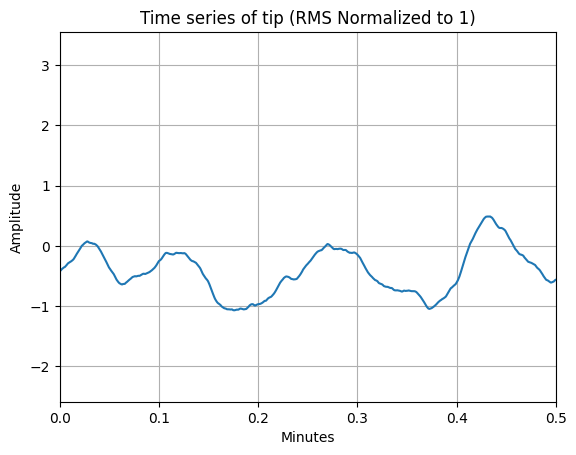

In [45]:
plt.plot(times/60, zmode_coeff[0])
plt.title('Time series of tip (RMS Normalized to 1)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([0,0.5])
plt.xlabel('Minutes')
plt.show()